**Machine Learning Assignment 1 - Group B**

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_01.csv', sep=";")

feature_names = list(df.head(0))
feature_names.pop(0)

print(feature_names)


['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle']


In [41]:
#print out first 5 rows of data set
df.head()

Unnamed: 0  AltitudeVariation  ...                 traffic   drivingStyle
0          59          -2.299988  ...  LowCongestionCondition  EvenPaceStyle
1          60          -2.099976  ...  LowCongestionCondition  EvenPaceStyle
2          61          -1.500000  ...  LowCongestionCondition  EvenPaceStyle
3          62           0.100037  ...  LowCongestionCondition  EvenPaceStyle
4          63           0.099976  ...  LowCongestionCondition  EvenPaceStyle

[5 rows x 18 columns]

In [42]:
df.drop(['Unnamed: 0', 'traffic'], axis=1, inplace=True)
df.head()

AltitudeVariation  VehicleSpeedInstantaneous  ...      roadSurface   drivingStyle
0          -2.299988                  25.670519  ...  SmoothCondition  EvenPaceStyle
1          -2.099976                  24.094259  ...  SmoothCondition  EvenPaceStyle
2          -1.500000                  22.743179  ...  SmoothCondition  EvenPaceStyle
3           0.100037                  22.292820  ...  SmoothCondition  EvenPaceStyle
4           0.099976                  23.643900  ...  SmoothCondition  EvenPaceStyle

[5 rows x 16 columns]

In [43]:
df.describe()

AltitudeVariation  ...  FuelConsumptionAverage
count        7038.000000  ...             7038.000000
mean           -0.675845  ...               15.446272
std             1.691601  ...                4.311013
min            -9.200012  ...                7.271883
25%            -1.500000  ...               12.319374
50%            -0.399963  ...               15.284765
75%             0.100037  ...               18.393147
max             5.200012  ...               25.666862

[8 rows x 14 columns]

In [44]:
df.describe(include=[np.object])

roadSurface   drivingStyle
count              7038           7038
unique                2              2
top     SmoothCondition  EvenPaceStyle
freq               6873           5751

In [0]:
df['drivingStyle'] = df.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df['roadSurface']= df.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 3 and nunique[col] < 2000]] # For displaying purposes, pick columns that have between 3 and 2000 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 0.7, w_pad = 0.5, h_pad = 0.5)
    plt.show()

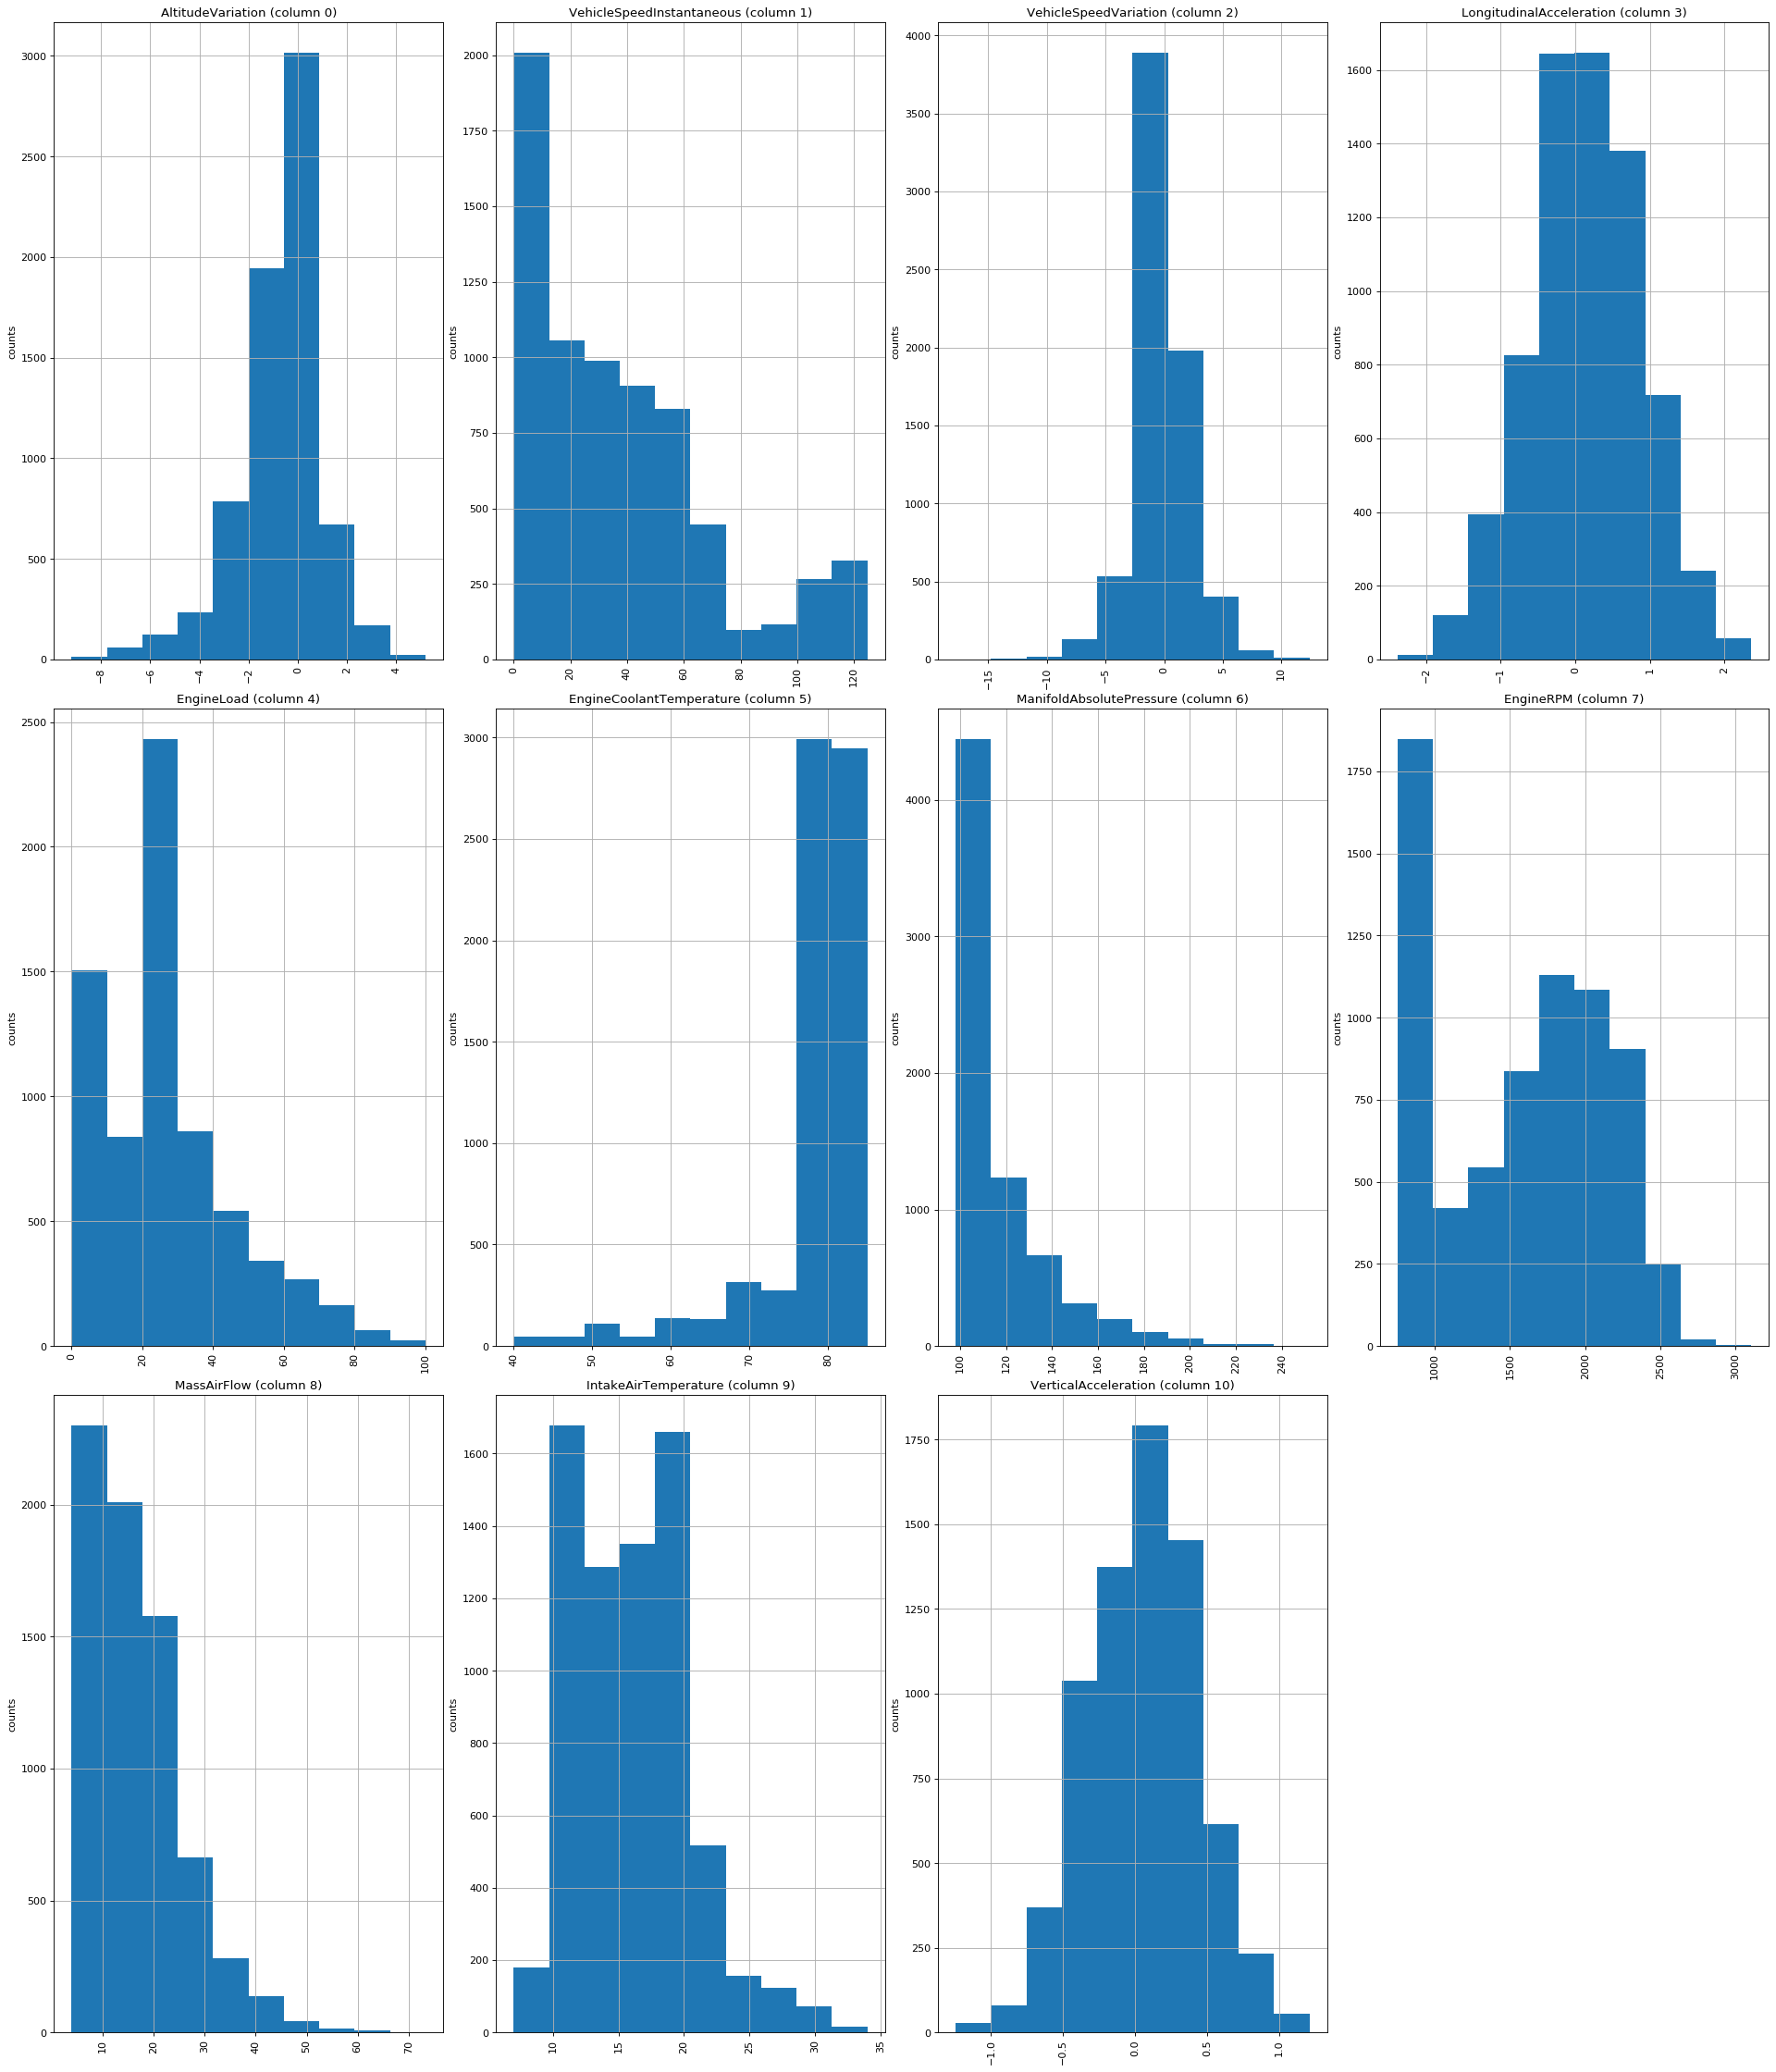

In [78]:
plotPerColumnDistribution(df, 11, 4)

In [0]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for opel_corsa_01', fontsize=15)
    plt.show()

In [0]:
# Scatter and density plots for first 7 Columns
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:7]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [0]:
# Scatter and density plots for Columns 8-14
def plotScatterMatrix8_14(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[7:14]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

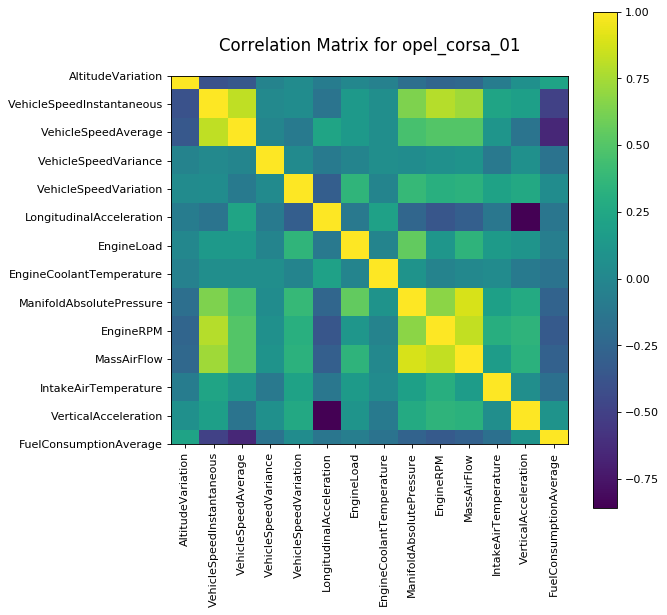

In [62]:
plotCorrelationMatrix(df, 8)

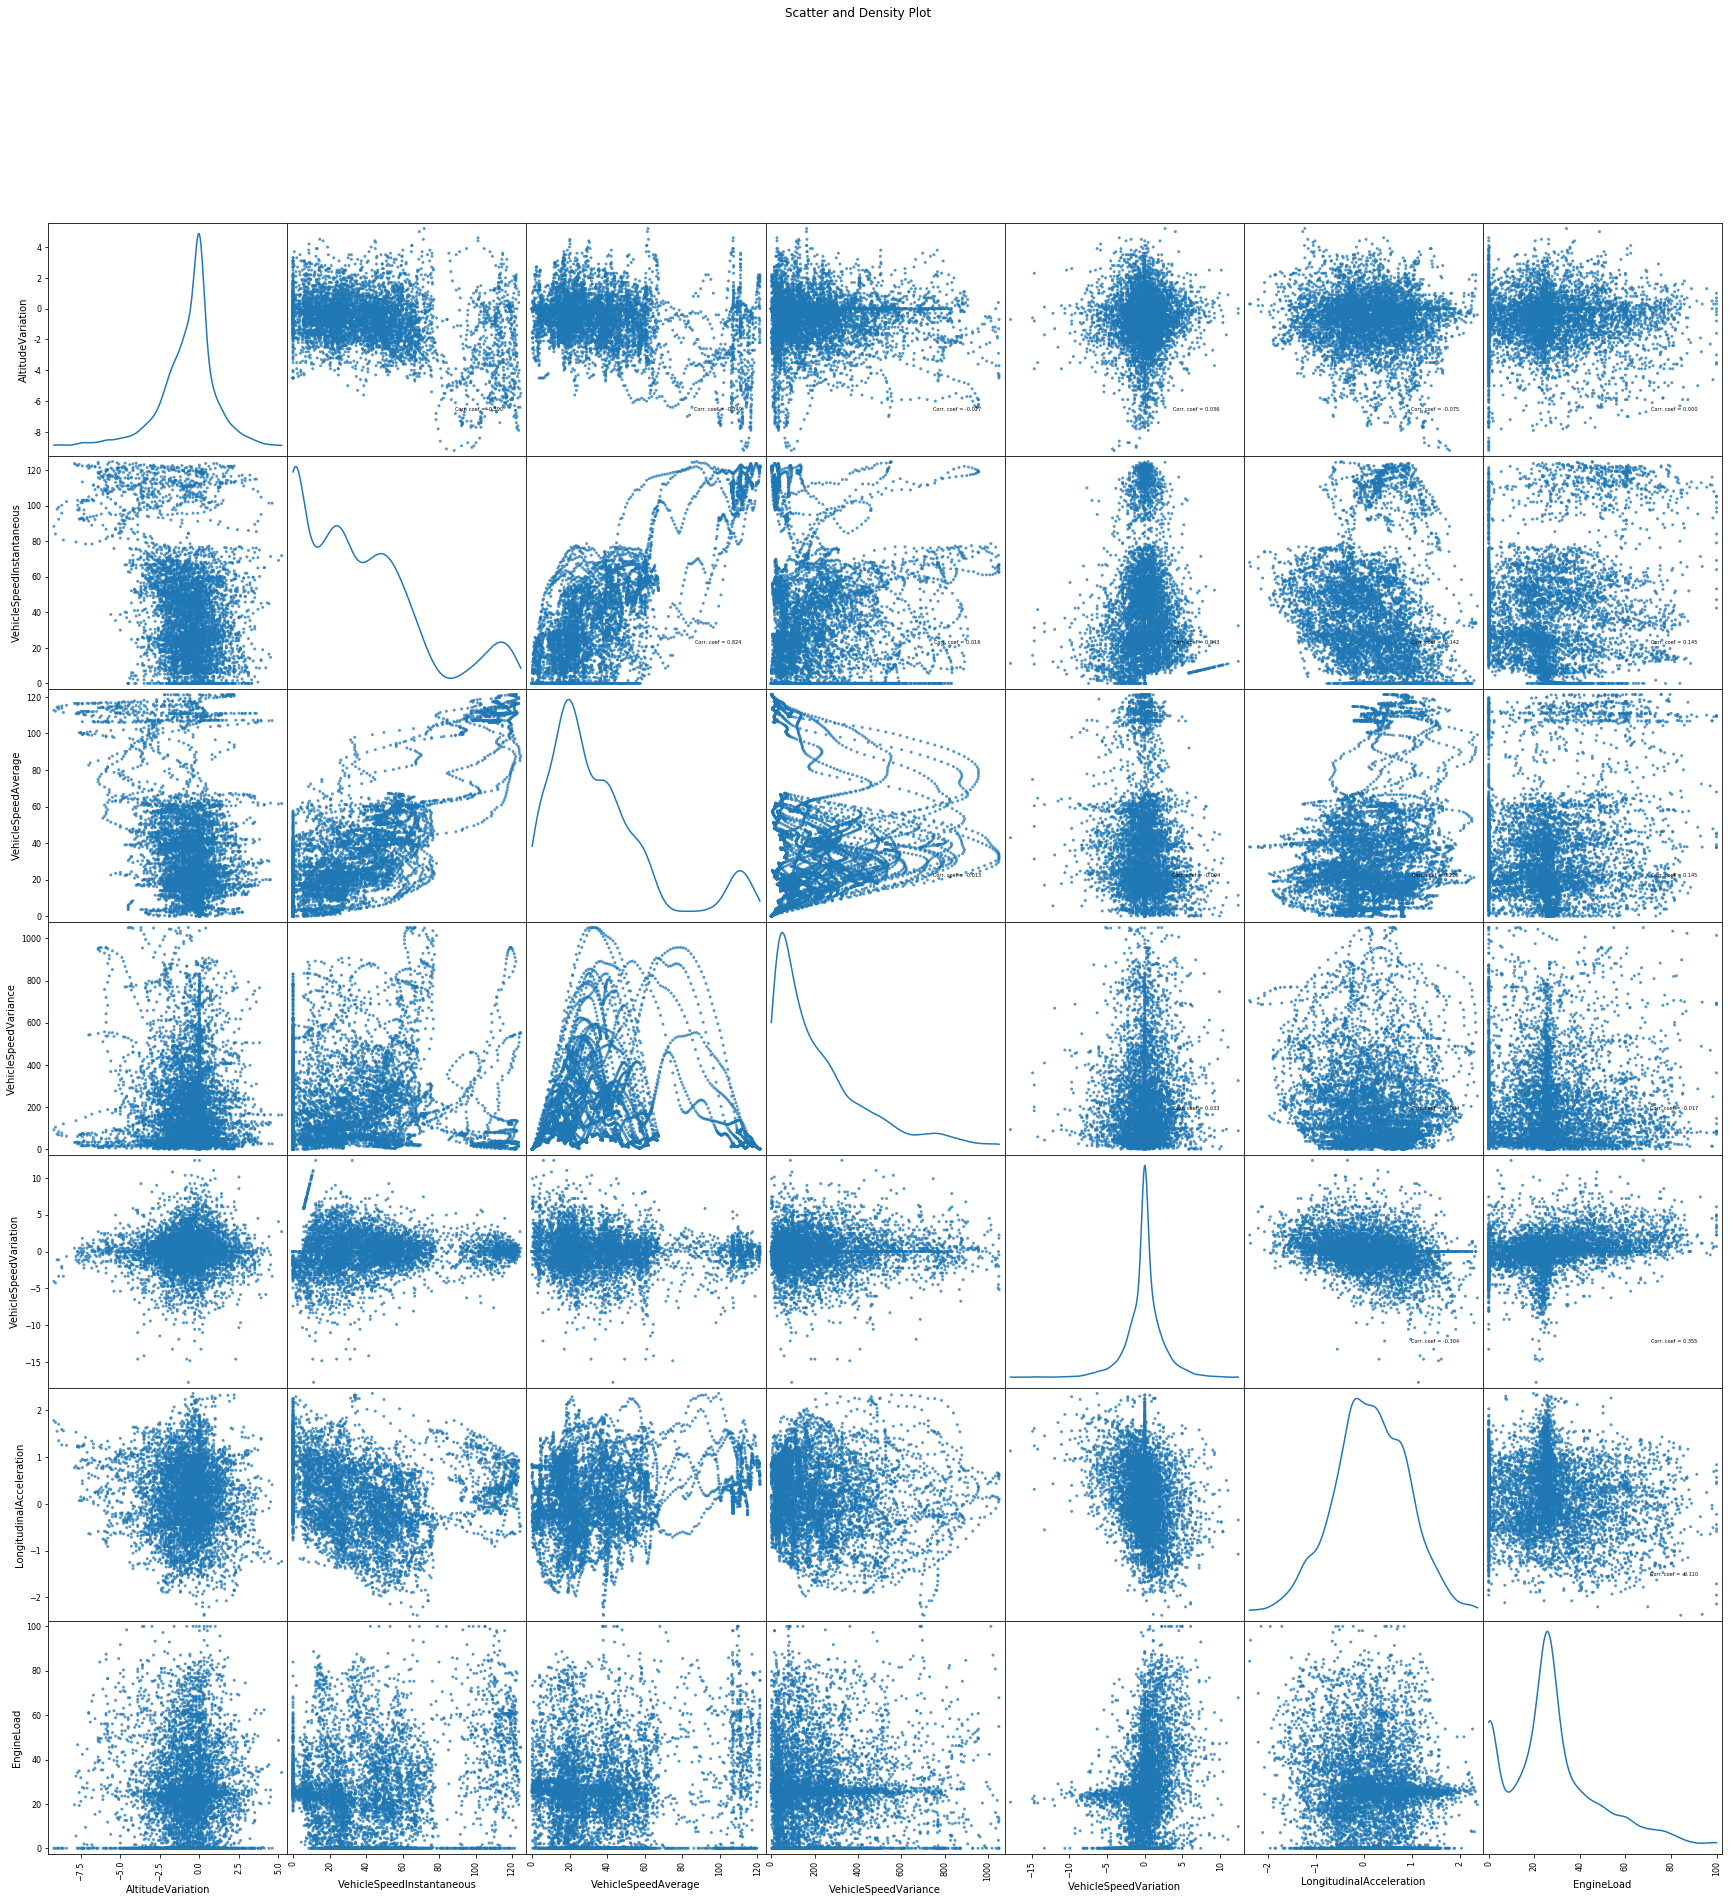

In [63]:
plotScatterMatrix(df, 30, 5)

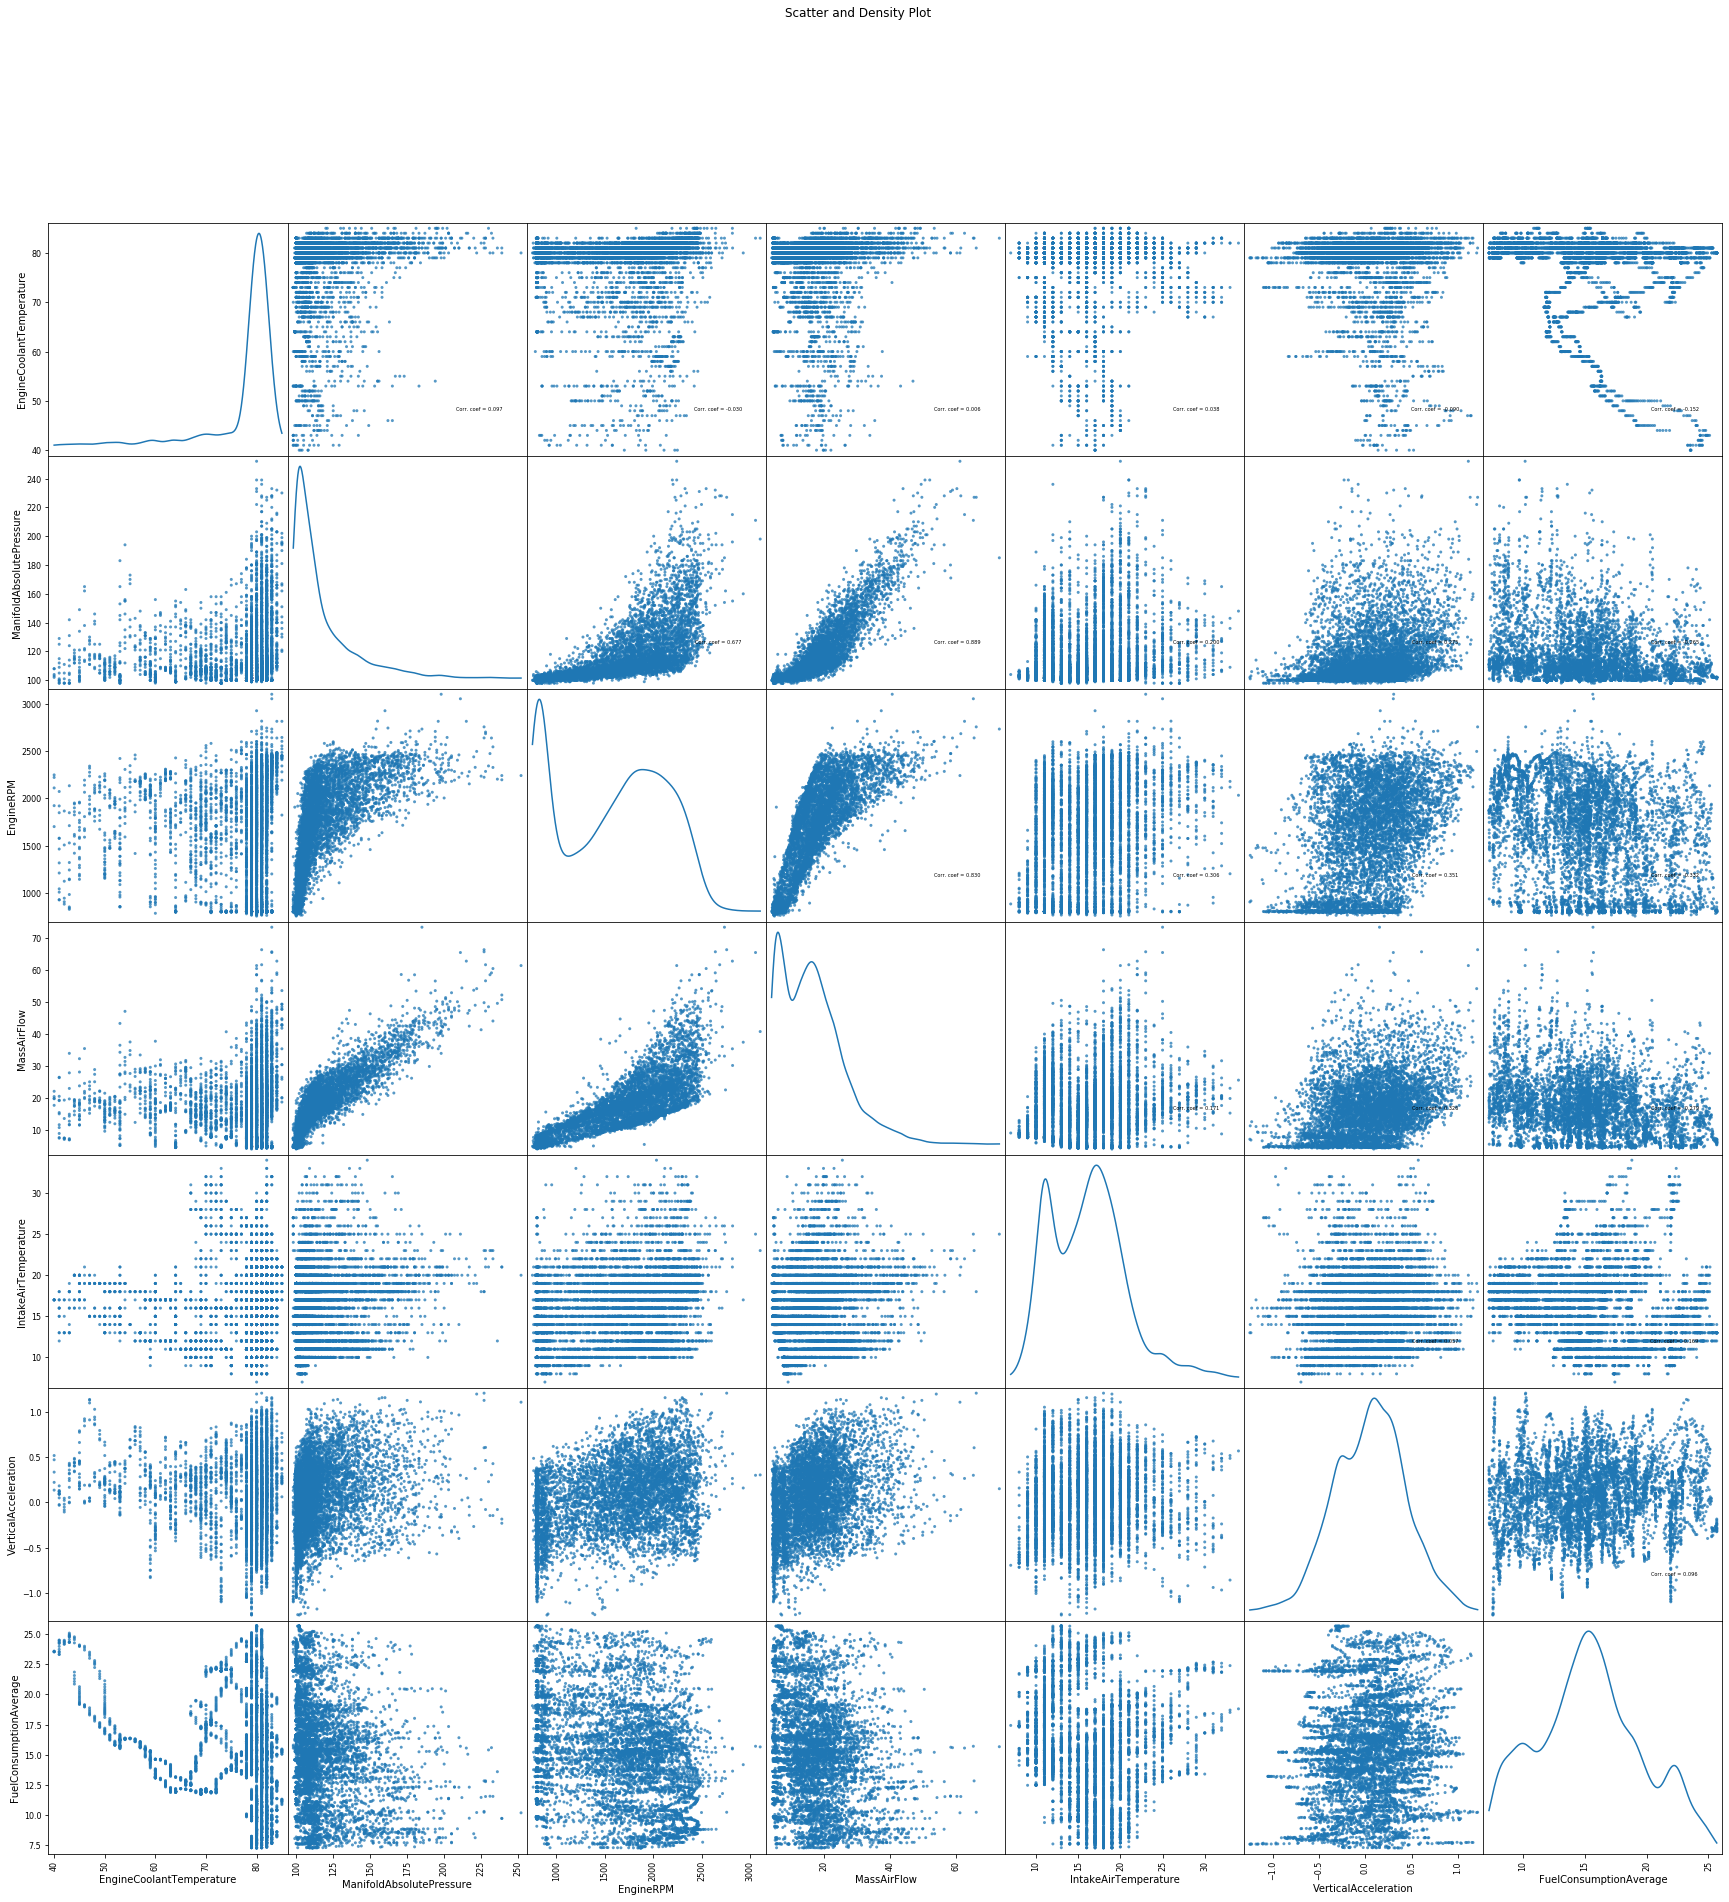

In [64]:
plotScatterMatrix8_14(df, 30, 5)

Before balancing data, see how classifiers perform:


In [79]:
list(df.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurface',
 'drivingStyle']

In [0]:
features = ['AltitudeVariation','VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']

In [81]:
X = df[features]
X.head()


AltitudeVariation  ...  FuelConsumptionAverage
0          -2.299988  ...               19.497335
1          -2.099976  ...               19.515722
2          -1.500000  ...               19.441765
3           0.100037  ...               19.388769
4           0.099976  ...               19.301638

[5 rows x 14 columns]

In [72]:
print(X.shape)

(7038, 14)


In [82]:
y = df['drivingStyle']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5278, 14)
(1760, 14)
(5278,)
(1760,)


In [85]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)


0.18409090909090908
0.8159090909090909


=> Even if Even Driving Style is predicted always, the accuracy would be **81.56%**
=> We need to design a classifer that provides better accuracy than this!

In [91]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual responce with predicted (accuracy):  0.8170454545454545
Precision:  0.5217391304347826
Recall:  0.07407407407407407
F1 Score:  0.07407407407407407
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90      1436
           1       0.52      0.07      0.13       324

    accuracy                           0.82      1760
   macro avg       0.67      0.53      0.51      1760
weighted avg       0.77      0.82      0.76      1760

Confusion Matrix: 
 [[1414   22]
 [ 300   24]]


In [95]:
logreg = LogisticRegression(solver='liblinear',class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred = logreg.predict(X_test)

print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.6289772727272728
Precision:  0.2956521739130435
Recall:  0.7345679012345679
F1 Score:  0.7345679012345679
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      1436
           1       0.30      0.73      0.42       324

    accuracy                           0.63      1760
   macro avg       0.60      0.67      0.57      1760
weighted avg       0.80      0.63      0.67      1760

Confusion Matrix: 
 [[869 567]
 [ 86 238]]


In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y2_pred))
print("Precision: ", metrics.precision_score(y_test, y2_pred))
print("Recall: ", metrics.recall_score(y_test, y2_pred))
print("F1 Score: ", metrics.recall_score(y_test, y2_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y2_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y2_pred))

Compare actual response with predicted (accuracy):  0.8278409090909091
Precision:  0.56
Recall:  0.30246913580246915
F1 Score:  0.30246913580246915
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1436
           1       0.56      0.30      0.39       324

    accuracy                           0.83      1760
   macro avg       0.71      0.62      0.65      1760
weighted avg       0.80      0.83      0.81      1760

Confusion Matrix: 
 [[1359   77]
 [ 226   98]]


In [102]:
from sklearn import svm
modelsvm = svm.SVC(kernel ='linear')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.8170454545454545
Precision:  0.5357142857142857
Recall:  0.046296296296296294
F1 Score:  0.046296296296296294
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      1436
           1       0.54      0.05      0.09       324

    accuracy                           0.82      1760
   macro avg       0.68      0.52      0.49      1760
weighted avg       0.77      0.82      0.75      1760

Confusion Matrix: 
 [[1423   13]
 [ 309   15]]


In [105]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.6107954545454546
Precision:  0.29418472063854045
Recall:  0.7962962962962963
F1 Score:  0.7962962962962963
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.57      0.70      1436
           1       0.29      0.80      0.43       324

    accuracy                           0.61      1760
   macro avg       0.61      0.68      0.57      1760
weighted avg       0.81      0.61      0.65      1760

Confusion Matrix: 
 [[817 619]
 [ 66 258]]
